In [10]:
import numpy as np
import xarray as xr
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings("ignore")

In [2]:
jalur1 = 'D:/PAPERBANJIR/ERA5/variable.nc'
data = xr.open_dataset(jalur1)
jalur2 = 'D:/PAPERBANJIR/ERA5/SST.nc'
sst = xr.open_dataset(jalur2)

In [3]:
theta = sst['sst']-273.15

In [4]:
daily_theta = theta.resample(valid_time='1D').mean(dim='valid_time')

In [5]:
daily_theta.valid_time

<xarray.DataArray 'valid_time' (valid_time: 11719)> Size: 94kB
array(['1985-07-01T00:00:00.000000000', '1985-07-02T00:00:00.000000000',
       '1985-07-03T00:00:00.000000000', ..., '2017-07-29T00:00:00.000000000',
       '2017-07-30T00:00:00.000000000', '2017-07-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 94kB 1985-07-01 ... 2017-07-31
    number      int64 8B ...
Attributes:
    long_name:      time
    standard_name:  time

In [6]:
initial = daily_theta.sel(valid_time=slice('1985-07-01', '2015-07-31'))
initiate_anomaly = daily_theta.sel(valid_time=slice('2017-07-01' , '2017-07-31'))

climatology = initial.groupby('valid_time.day').mean(dim='valid_time')
anomaly = initiate_anomaly - climatology

set_anomaly = anomaly.sel(valid_time=slice('2017-07-14' , '2017-07-16')).sel(day=slice(14, 16)).mean('valid_time').mean('day')

In [7]:
normal_mean = initiate_anomaly.mean('valid_time')
normal_mean

<xarray.DataArray 'sst' (latitude: 81, longitude: 141)> Size: 46kB
array([[28.779663, 28.738304, 28.718187, ..., 30.070045, 30.006104,
        29.807474],
       [28.775366, 28.746632, 28.740128, ..., 29.731258, 29.819687,
        29.711725],
       [28.746634, 28.733051, 28.73426 , ..., 29.993034, 29.906961,
        30.005459],
       ...,
       [27.782658, 27.837885, 27.871284, ...,       nan,       nan,
              nan],
       [27.653315, 27.722525, 27.761879, ...,       nan,       nan,
        27.479916],
       [27.53473 , 27.605852, 27.661064, ...,       nan, 27.251444,
        27.374765]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 648B 10.0 9.75 9.5 9.25 ... -9.5 -9.75 -10.0
  * longitude  (longitude) float64 1kB 90.0 90.25 90.5 ... 124.5 124.8 125.0
    number     int64 8B ...

Text(0, 0.5, 'y')

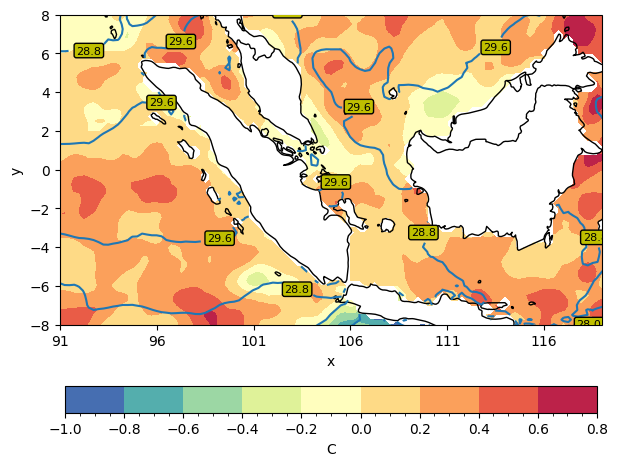

In [11]:
plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([91, 119, -8, 4], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(91, 119, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(8, -10, -2), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='k')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='k')

levels = np.arange(-1, 1, 0.2)
anomaly = ax.contourf(set_anomaly.longitude, set_anomaly.latitude, set_anomaly, levels=levels, cmap= plt.cm.Spectral_r, transform=ccrs.PlateCarree())
contour = ax.contour(normal_mean.longitude, normal_mean.latitude, normal_mean, colors='tab:blue', linestyle='dashed', transform=ccrs.PlateCarree())
box = ax.clabel(contour, inline=1, fontsize=8, fmt='%1.1f', colors='black', inline_spacing=8, rightside_up=True, use_clabeltext=True)

for label in box:
    label.set_bbox({'fc': 'y', 'boxstyle': 'round,pad=0.2'})
    label.set_rotation(0)
    
cbar = plt.colorbar(anomaly, orientation='horizontal', label='C', pad=0.1, shrink=0.98)
cbar.minorticks_on()

plt.xlabel('x')
plt.ylabel('y')

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/tracking/'
#plt.savefig(os.path.join(output, 'sst.png'), bbox_inches='tight', dpi=900)

In [12]:
#rewrite initial memory to calculate integrated vapor transport
jalur1 = 'D:/PAPERBANJIR/ERA5/ivt.nc'
data = xr.open_dataset(jalur1, decode_times=False)

jalur2 = 'D:/PAPERBANJIR/ERA5/variable.nc'
data2 = xr.open_dataset(jalur2)

In [13]:
ivt = data['ivt']
x = data2['longitude']
y = data2['latitude']

u = data2['u']
v = data2['v']

mean_u = u.sel(pressure_level=850).mean('valid_time')
mean_v = v.sel(pressure_level=850).mean('valid_time')

mean_ivt = ivt.mean('ivt')

Text(0, 0.5, 'y')

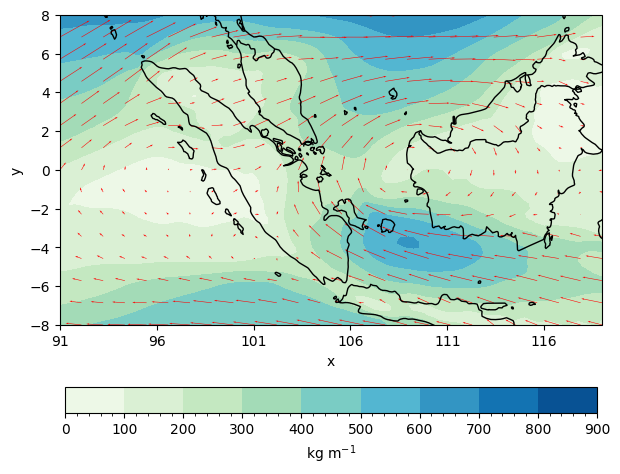

In [14]:
plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([91, 119, -8, 4], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(91, 119, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(8, -10, -2), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='k')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='k')


Q = ax.contourf(x, y, mean_ivt, cmap= plt.cm.GnBu, transform=ccrs.PlateCarree())
Q_vector = ax.quiver(x, y, mean_u, mean_v, color='r', regrid_shape=15, width=0.001, 
                     transform=ccrs.PlateCarree())

cbar = plt.colorbar(Q, orientation='horizontal', label='kg m$^{-1}$', pad=0.1, shrink=0.98)
cbar.minorticks_on()
plt.xlabel('x')
plt.ylabel('y')

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/tracking/'
#plt.savefig(os.path.join(output, 'IVT.png'), bbox_inches='tight', dpi=900)

In [18]:
#calculate from ERA 5 Reanalysis Data

u = data2['u']
v = data2['v']
q = data2['q']*0.001 #(g/kg)

g = 9.81 #gravitation acceleration
pressure_levels = data2['pressure_level'] * 100 

In [19]:
p_min_idx = np.where(pressure_levels == 100000)[0][0]  # 1000 mb
p_max_idx = np.where(pressure_levels == 30000)[0][0]    # 300 mb

In [21]:
# Initialize IVT array
IVT = np.zeros(u.shape[1:])
qu_integral = np.zeros(u.shape[2:])
qv_integral = np.zeros(u.shape[2:])

# Calculate the IVT
for t in range(u.shape[0]):  # Loop over time
    # Integrate qu and qv over the specified pressure levels
    qu = q[t, :, :, :] * u[t, :, :, :]
    qv = q[t, :, :, :] * v[t, :, :, :]
    # Trapezoidal integration
    qu_integral += np.trapz(qu[p_min_idx:p_max_idx + 1, :, :], 
                             pressure_levels[p_min_idx:p_max_idx + 1], 
                             axis=0)
    qv_integral += np.trapz(qv[p_min_idx:p_max_idx + 1, :, :], 
                             pressure_levels[p_min_idx:p_max_idx + 1], 
                             axis=0)

IVT = np.sqrt((1 / g * qu_integral) ** 2 + (1 / g * qv_integral) ** 2)
# Average IVT over time
IVT_avg = IVT 
#array for IVT
IVT_da = xr.DataArray(IVT_avg, coords=[data2['latitude'], data2['longitude']], dims=['latitude', 'longitude'], name='IVT')

In [22]:
IVT_da

<xarray.DataArray 'IVT' (latitude: 81, longitude: 141)> Size: 91kB
array([[51.03834509, 51.43748934, 51.77347415, ...,  0.17810788,
         0.71754789,  1.16825633],
       [50.04964622, 50.43100383, 50.76284455, ...,  0.3790863 ,
         0.28230771,  0.64807606],
       [49.07416315, 49.46229656, 49.75864034, ...,  0.81380363,
         0.3188378 ,  0.21492696],
       ...,
       [28.61682412, 28.88510908, 29.16146773, ..., 11.02747916,
        13.2052107 , 13.48882084],
       [28.72336132, 28.98089368, 29.24667181, ...,  9.49122517,
        11.53810924, 12.72195188],
       [28.7881831 , 29.04595452, 29.30938435, ..., 11.55763003,
        11.99478923, 12.43930047]])
Coordinates:
  * latitude   (latitude) float64 648B 10.0 9.75 9.5 9.25 ... -9.5 -9.75 -10.0
  * longitude  (longitude) float64 1kB 90.0 90.25 90.5 ... 124.5 124.8 125.0

Text(0, 0.5, 'y')

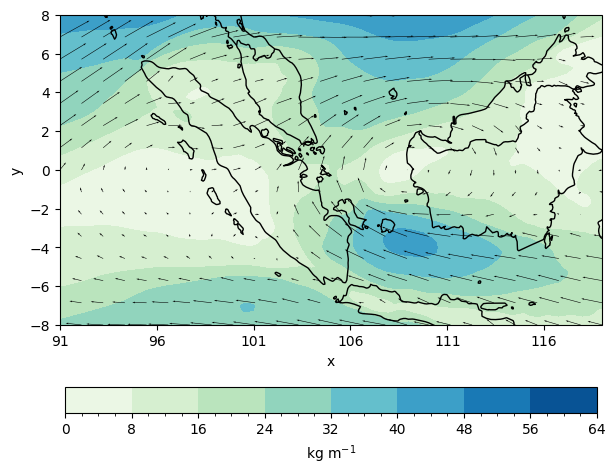

In [23]:
plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([91, 119, -8, 4], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(91, 119, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(8, -10, -2), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='k')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='k')


Q = ax.contourf(IVT_da.longitude, IVT_da.latitude, IVT_da, cmap= plt.cm.GnBu, transform=ccrs.PlateCarree())
Q_vector = ax.quiver(x, y, mean_u, mean_v, color='k', regrid_shape=15, width=0.001, 
                     transform=ccrs.PlateCarree())

cbar = plt.colorbar(Q, orientation='horizontal', label='kg m$^{-1}$', pad=0.1, shrink=0.98)
cbar.minorticks_on()
plt.xlabel('x')
plt.ylabel('y')

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/tracking/'
#plt.savefig(os.path.join(output, 'IVT.png'), bbox_inches='tight', dpi=900)

In [25]:
lon = data2['longitude']
lat = data2['latitude']

#time setting
mean_u = u.sel(pressure_level=850).mean('valid_time')
mean_v = v.sel(pressure_level=850).mean('valid_time')
mean_q = q.sel(pressure_level=850).mean('valid_time')

x, y = np.meshgrid(lon, lat)

Text(0, 0.5, 'y')

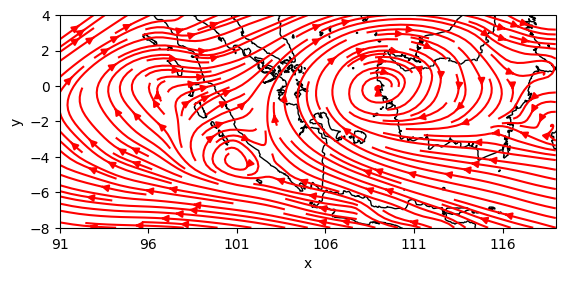

In [27]:
# plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([91, 119, -8, 4], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(91, 119, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(4, -9, -2), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='k')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='k')

Q = ax.streamplot(x, y, mean_u, mean_v, color='r', density = 1.5, transform=ccrs.PlateCarree())
plt.xlabel('x')
plt.ylabel('y')

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/tracking/'
#plt.savefig(os.path.join(output, 'streamline.png'), bbox_inches='tight', dpi=900)

Text(0, 0.5, 'y')

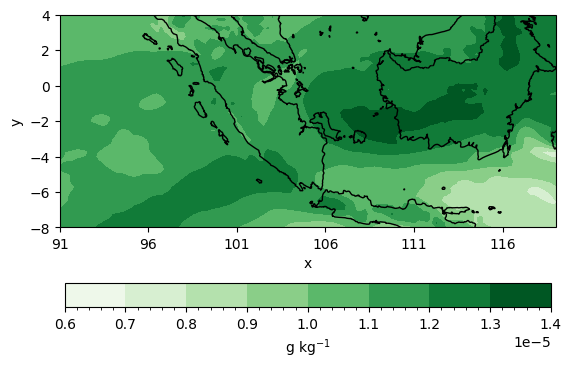

In [28]:
# plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([91, 119, -8, 4], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(91, 119, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(4, -9, -2), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='k')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='k')

Q = ax.contourf(x, y, mean_q, cmap=plt.cm.Greens, transform=ccrs.PlateCarree())
#V = ax.quiver(x, y, mean_u, mean_v, color='r', regrid_shape=10, width=0.003, transform=ccrs.PlateCarree())
cbar = plt.colorbar(Q, orientation='horizontal', label='g kg$^{-1}$', pad=0.15, shrink=0.98)
cbar.minorticks_on()
plt.xlabel('x')
plt.ylabel('y')

#output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/tracking/'
#plt.savefig(os.path.join(output, 'specific_humid.png'), bbox_inches='tight', dpi=900)